# HW3 Computing Problem 1

In [1]:
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import math
import pandas as pd

In [2]:
faces1 = loadmat('./HW3data/faces1.mat')

In [3]:
faces1=faces1['Y1']

In [4]:
faces1=faces1.astype(np.float32)

In [5]:
faces1.shape

(19200, 109)

In [6]:
120*160

19200

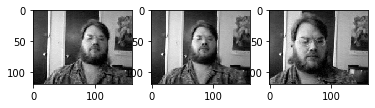

In [7]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(faces1[:,0].reshape(160,120).T,cmap='gray')
ax[1].imshow(faces1[:,5].reshape(160,120).T,cmap='gray')
ax[2].imshow(faces1[:,108].reshape(160,120).T,cmap='gray')

### (a) Ensemble average image

In [8]:
mu=np.mean(faces1,axis=1)

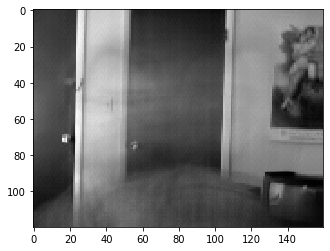

In [9]:
plt.imshow(mu.reshape(160,120).T,cmap='gray')

### (b) mean subtracted image

In [10]:
mean_intensity=np.mean(faces1,axis=0)

In [11]:
mean_intensity.shape

(109,)

In [12]:
faces1[:,0].mean()

105.785675

In [13]:
mean_intensity.shape

(109,)

In [14]:
faces1.shape

(19200, 109)

In [15]:
mean_sub=faces1 - mean_intensity

###### Original

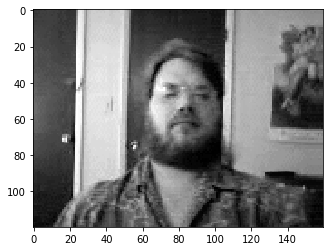

In [16]:
plt.imshow(faces1[:,6].reshape(160,120).T,cmap='gray')

###### Mean subtracted

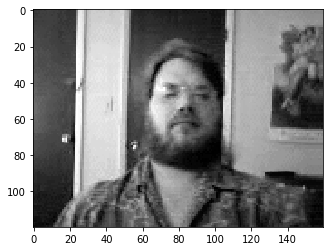

In [17]:
plt.imshow(mean_sub[:,6].reshape(160,120).T,cmap='gray')

In [18]:
mean_sub.shape

(19200, 109)

### (c) Determining eigenpictures by snapshot method

In [19]:
Ct=np.matmul(mean_sub.T,mean_sub)

In [21]:
eigvals, eigvecs = np.linalg.eigh(Ct)

In [23]:
eigvecs=np.flip(eigvecs,axis=1)

In [24]:
eigvecs.shape

(109, 109)

In [25]:
eigvals.shape

(109,)

In [26]:
eigvals=np.abs(np.round(eigvals,2))

In [27]:
eigvals=np.flip(eigvals)

In [28]:
sigmas = np.sqrt(eigvals)

In [29]:
Sigma = np.diag(sigmas)

In [30]:
Sigma.shape

(109, 109)

In [33]:
Sigma_plus = np.linalg.pinv(Sigma)

In [34]:
U = np.matmul(np.matmul(mean_sub,eigvecs),Sigma_plus)

In [36]:
mean_sub.shape,eigvecs.shape,Sigma_plus.shape

((19200, 109), (109, 109), (109, 109))

In [37]:
U.shape

(19200, 109)

In [38]:
np.round(np.dot(U[:,0],U[:,1]))

-0.0

In [39]:
np.round(np.dot(U[:,10],U[:,10]))

1.0

##### Eigenpictures

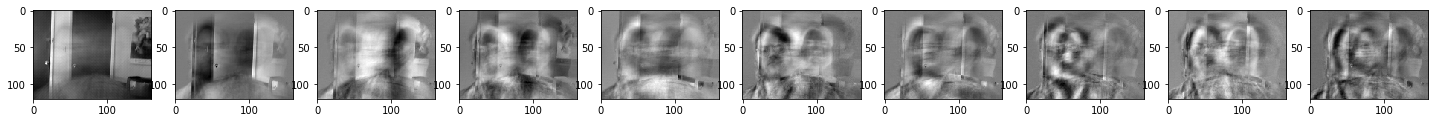

In [120]:
fig, ax = plt.subplots(1, 10,figsize=(25,25))
for i in range(10):
    ax[i].imshow(U[:,i].reshape(160,120).T,cmap='gray')

##### veryfying with SVD

In [41]:
U,S,V=np.linalg.svd(mean_sub,full_matrices=False)

In [42]:
U.shape

(19200, 109)

In [43]:
V.shape

(109, 109)

In [44]:
k=10

In [45]:
A_k = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))

In [46]:
A_k.shape

(19200, 109)

In [47]:
np.dot(U[:,0],U[:,0])

1.0

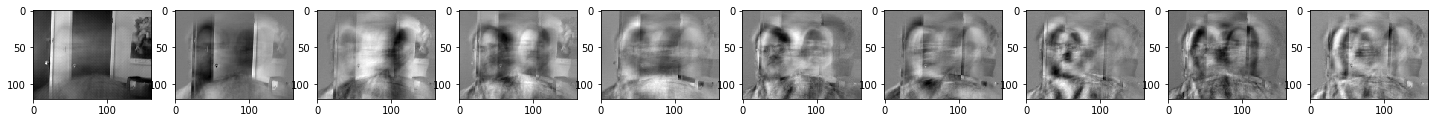

In [48]:
fig, ax = plt.subplots(1, 10,figsize=(25,25))
for i in range(10):
    ax[i].imshow(U[:,i].reshape(160,120).T,cmap='gray')

In [167]:
mean_sub[:,6].shape

(19200,)

In [228]:
U.shape

(19200, 109)

### (d) Partial reconstruction

0 0


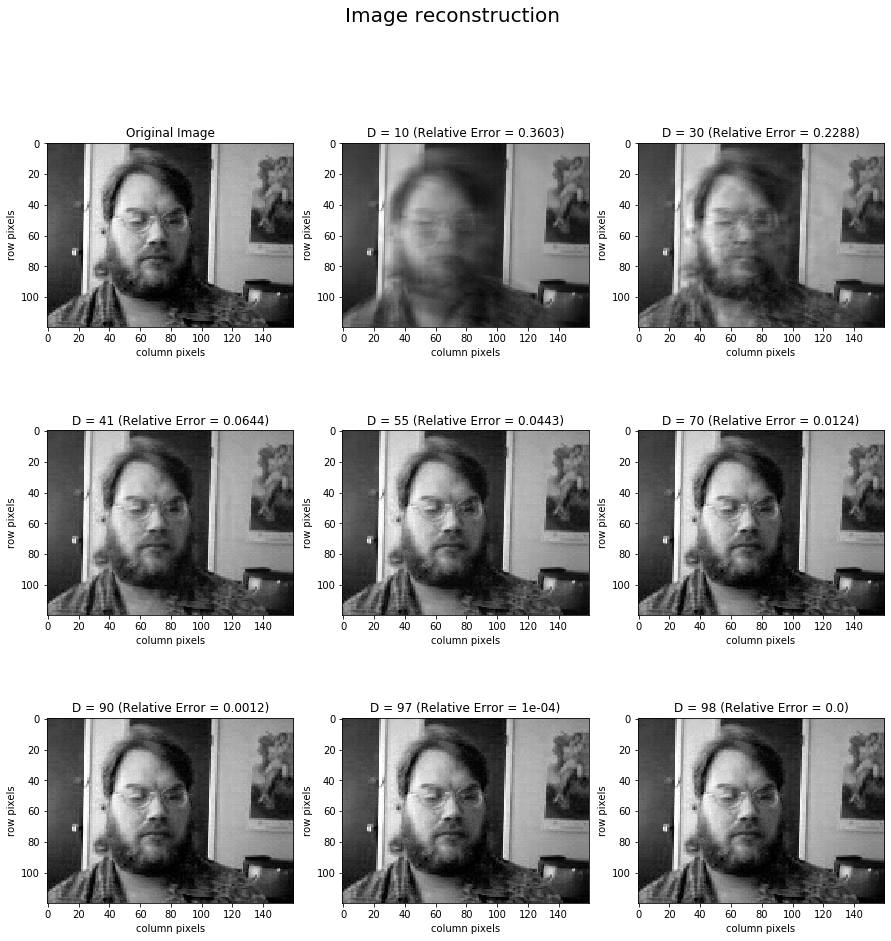

In [195]:
x=mean_sub[:,108]
fig, ax = plt.subplots(3, 3,figsize=(15,15))
fig.suptitle('Image reconstruction', fontsize=20)
ax[0,0].set_title('Original Image')
ax[0,0].set_xlabel('column pixels')
ax[0,0].set_ylabel('row pixels')
ax[0,0].imshow(x.reshape(160,120).T,cmap='gray')
D_list=[10,30,41,55,70,90,97,98]
ctr=0
for row in range(3):
    for col in range(3):
        if (row==0 and col==0):
            continue
        else:
            xD=np.matmul(np.matmul(U[:,0:D_list[ctr]],U[:,0:D_list[ctr]].T),x)
            relative_error=np.round(np.linalg.norm(x-xD)/np.linalg.norm(x),4)
            ax[row,col].set_title('D = '+str(D_list[ctr])+' (Relative Error = '+str(relative_error)+')')
            ax[row,col].set_xlabel('column pixels')
            ax[row,col].set_ylabel('row pixels')
            ax[row,col].imshow(xD.reshape(160,120).T,cmap='gray')
            ctr +=1

In [197]:
np.linalg.matrix_rank(faces1)

98

### (e) Graph of $\lambda_i/\lambda_{max}$

In [184]:
lambdas=pd.DataFrame(eigvals,columns=['lambda'])

In [185]:
lambdas['i'] = lambdas.index + 1

In [186]:
lambdas['lambda_i/lambda_max'] = lambdas['lambda']/lambdas['lambda'].max()

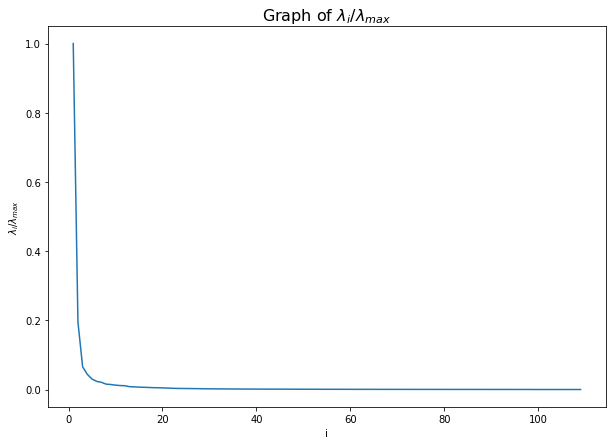

In [187]:
fig, ax = plt.subplots(1, 1,figsize=(10,7))
ax.set_title('Graph of $\lambda_i/\lambda_{max}$',fontsize=16)
ax.set_xlabel('i')
ax.set_ylabel('$\lambda_i/\lambda_{max}$')
ax.plot(lambdas['i'],lambdas['lambda_i/lambda_max'])

In [188]:
lambdas

,lambda,i,lambda_i/lambda_max
0,5.595008e+09,1,1.000000
1,1.091896e+09,2,0.195155
2,3.658350e+08,3,0.065386
3,2.449413e+08,4,0.043779
4,1.691472e+08,5,0.030232
5,1.309923e+08,6,0.023412
6,1.164114e+08,7,0.020806
7,8.676419e+07,8,0.015507
8,8.069685e+07,9,0.014423
9,7.049070e+07,10,0.012599


### (f) Classification algorithm using PCA

In [41]:
#### see report